In [1]:
import os, sys
import general_config 
print(general_config.ROOTDIR)
sys.path.append(general_config.ROOTDIR)

import numpy as np
import matplotlib.pyplot as plt
from pipeline.objgen.random_generator_baseclass import SettingBuilder
from pipeline.objgen.random_simple_generator import SimpleRandomFetcher

D:/Desktop@D/xai_basic


In [2]:
sb = SettingBuilder()
for i in range(10):
    header = True if i==0 else None
    sb.print_setting(sb.generate_setting(meta_setting=None), header=header)

attr1       attr2       attr3       attr4       
0.284       1.205       [0.1, 1.2]  [0.772 0.824 0.175]
0.707       1.285       [0.1, 1.2]  [0.773 0.902 0.121]
0.986       0.707       [0.1, 1.2]  [0.789 0.613 0.184]
0.976       0.781       [0.1, 1.2]  [0.71  0.658 0.113]
0.223       0.834       [0.1, 1.2]  [0.777 0.782 0.176]
0.383       0.652       [0.1, 1.2]  [0.719 0.806 0.155]
0.289       1.063       [0.1, 1.2]  [0.736 0.808 0.145]
0.956       0.604       [0.1, 1.2]  [0.751 0.555 0.179]
0.181       0.948       [0.1, 1.2]  [0.71  0.776 0.192]
0.692       1.163       [0.1, 1.2]  [0.711 0.842 0.104]


In [3]:
RUN_TOGGLE = {}
for celltype in ['CCellX','CCellMX','CCellPX','RCellX','RCellXB','RCellXC','CCellTX','CCellTX3','CCellTX8']:
    RUN_TOGGLE[celltype] = 1 # binary. Set to 0 to skip the cells you are not interested in
# RUN_TOGGLE['CCellTX'] = 1  
# RUN_TOGGLE['CCellTX3'] = 1  
# RUN_TOGGLE['CCellTX8'] = 1  
# RUN_TOGGLE['CCellMX'] = 1   

In [4]:
explanation_setting = {
    'localization_threshold' : 0.05,
    'localization_value' : 0.4,
    'discriminative_feature_threshold' : 0.05,
    'discriminative_feature_value' : 0.9
}
unique_allowed_heatmap = {0,}

In [5]:
def create_multi_axes_figures(settings, figsize=(12,12)):
    fig = plt.figure(figsize=figsize)
    for axpos, img, title, is_heatmap in settings:
        if not is_heatmap:
            vmin, vmax = 0.,1.
            cmap=None
        else:
            vmin, vmax = -1.,1.
            cmap = 'bwr'
        fig.add_subplot(*axpos)
        plt.gca()
        cax = plt.gca().imshow(img, vmin=vmin, vmax=vmax, cmap=cmap)
        if title is not None:
            plt.gca().set_title(title)
        
        plt.gca().set_xlim(0,512)
        plt.gca().set_ylim(0,512)
        if is_heatmap:
            plt.colorbar(cax,fraction=0.04)
    plt.tight_layout()

In [6]:
sf = SimpleRandomFetcher()
sf.setup0001(general_meta_setting=None, explanation_setting=explanation_setting)

{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}


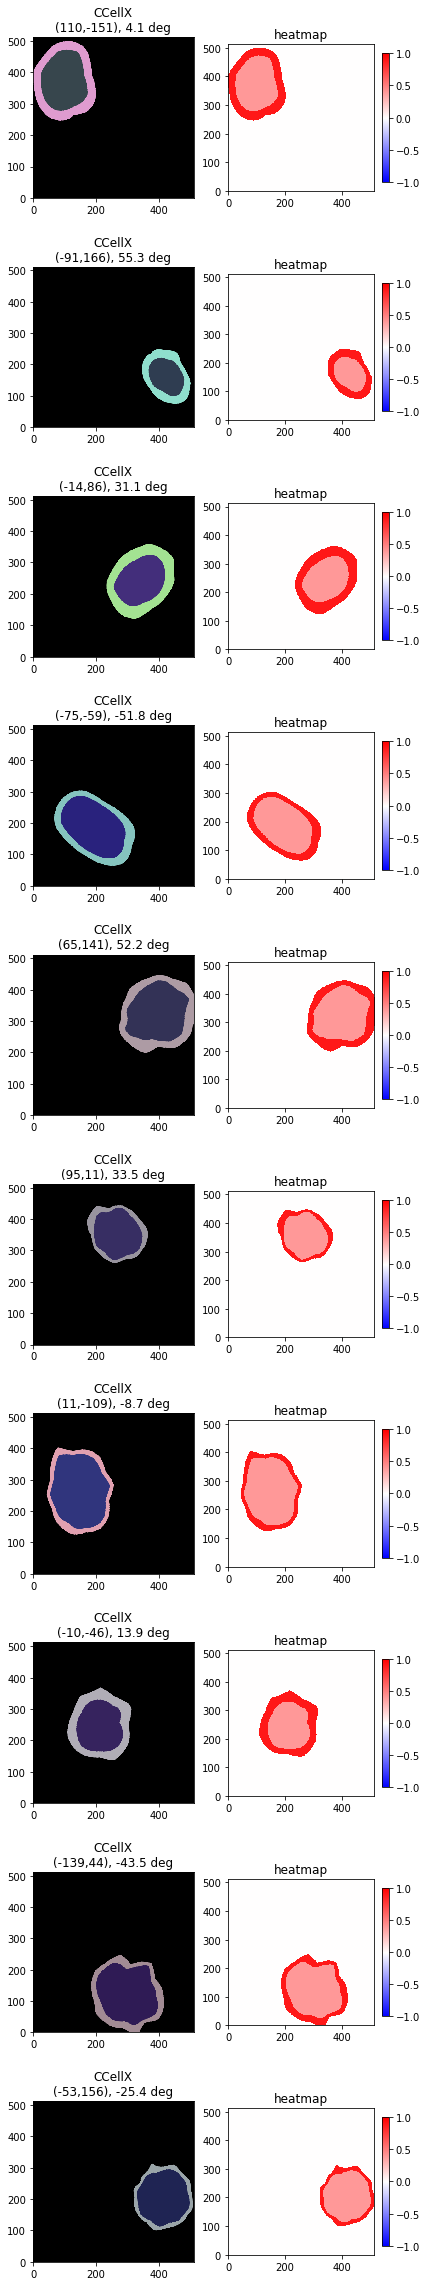

In [7]:
if RUN_TOGGLE['CCellX']:
    N = 10
    fig_settings = []
    fig_layout = (N,2)
    for i in range(1,N+1):
        cobj, cimg, heatmap, variables = sf.get_random_CCellX()
        print(set(list(heatmap.reshape(-1))))
        fig_settings.append((fig_layout+(2*i-1,), cimg, '%s\n(%s,%s), %s deg'%(str(variables['type']),
                str(variables['center'][0]),str(variables['center'][1]),str(round(variables['theta'],1))), False))
        fig_settings.append((fig_layout+(2*i,), heatmap, 'heatmap', True))
    create_multi_axes_figures(fig_settings, figsize=(6,np.max((16*int(N/5),5))))

{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}


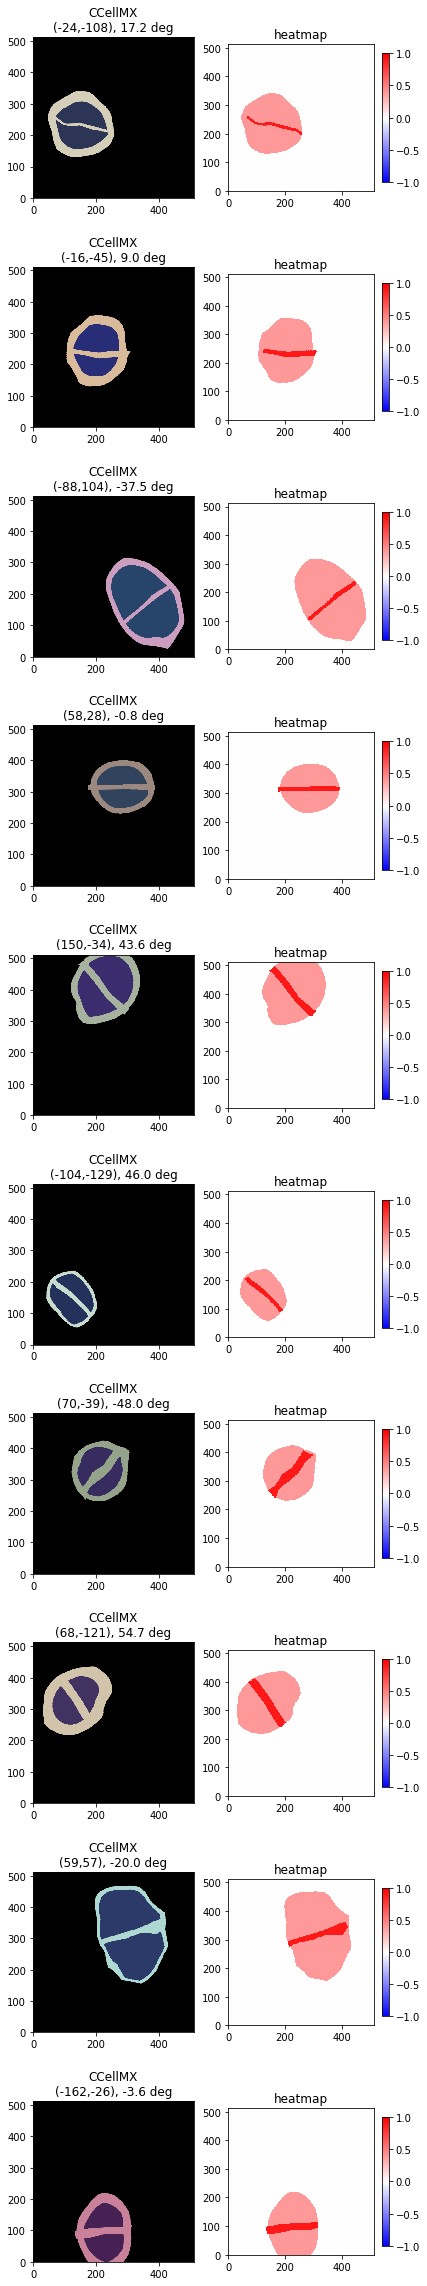

In [8]:
if RUN_TOGGLE['CCellMX']:
    N = 10
    fig_settings = []
    fig_layout = (N,2)
    for i in range(1,N+1):
        cobj, cimg, heatmap, variables = sf.get_random_CCellMX()
        print(set(list(heatmap.reshape(-1))))
        fig_settings.append((fig_layout+(2*i-1,), cimg, '%s\n(%s,%s), %s deg'%(str(variables['type']),
                str(variables['center'][0]),str(variables['center'][1]),str(round(variables['theta'],1))), False))
        fig_settings.append((fig_layout+(2*i,), heatmap, 'heatmap', True))
    create_multi_axes_figures(fig_settings, figsize=(6,np.max((16*int(N/5),5))))

{0.0, 0.9, 0.4}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.9, 0.4}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}


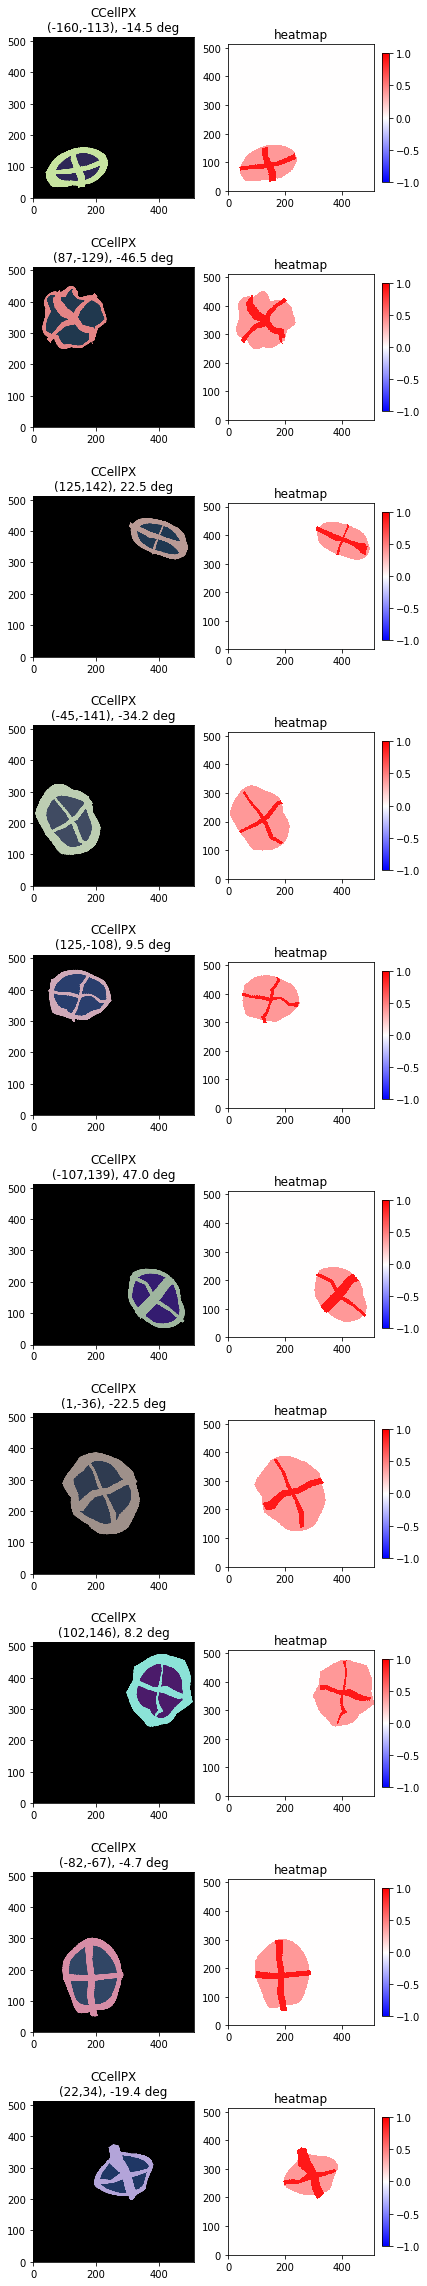

In [9]:
if RUN_TOGGLE['CCellPX']:
    N = 10
    fig_settings = []
    fig_layout = (N,2)
    for i in range(1,N+1):
        cobj, cimg, heatmap, variables = sf.get_random_CCellPX()
        print(set(list(heatmap.reshape(-1))))
        fig_settings.append((fig_layout+(2*i-1,), cimg, '%s\n(%s,%s), %s deg'%(str(variables['type']),
                str(variables['center'][0]),str(variables['center'][1]),str(round(variables['theta'],1))), False))
        fig_settings.append((fig_layout+(2*i,), heatmap, 'heatmap', True))
    create_multi_axes_figures(fig_settings, figsize=(6,np.max((16*int(N/5),5))))

{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}


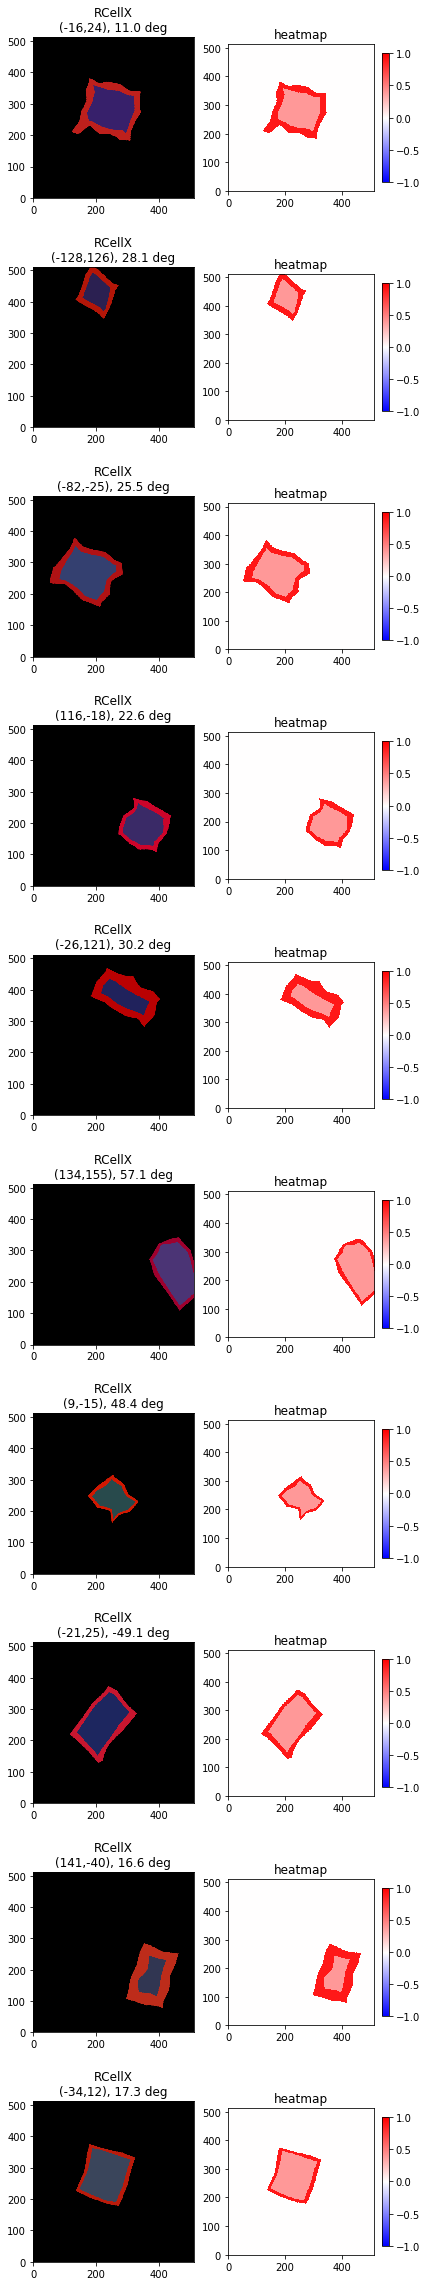

In [10]:
if RUN_TOGGLE['RCellX']:
    sf.setup0001(general_meta_setting=None, explanation_setting=explanation_setting)
    N = 10
    fig_settings = []
    fig_layout = (N,2)
    for i in range(1,N+1):
        cobj, cimg, heatmap, variables = sf.get_random_RCellX()
        print(set(list(heatmap.reshape(-1))))
        fig_settings.append((fig_layout+(2*i-1,), cimg, '%s\n(%s,%s), %s deg'%(str(variables['type']),
                str(variables['center'][0]),str(variables['center'][1]),str(round(variables['theta'],1))), False))
        fig_settings.append((fig_layout+(2*i,), heatmap, 'heatmap', True))
    create_multi_axes_figures(fig_settings, figsize=(6,np.max((16*int(N/5),5))))

{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}


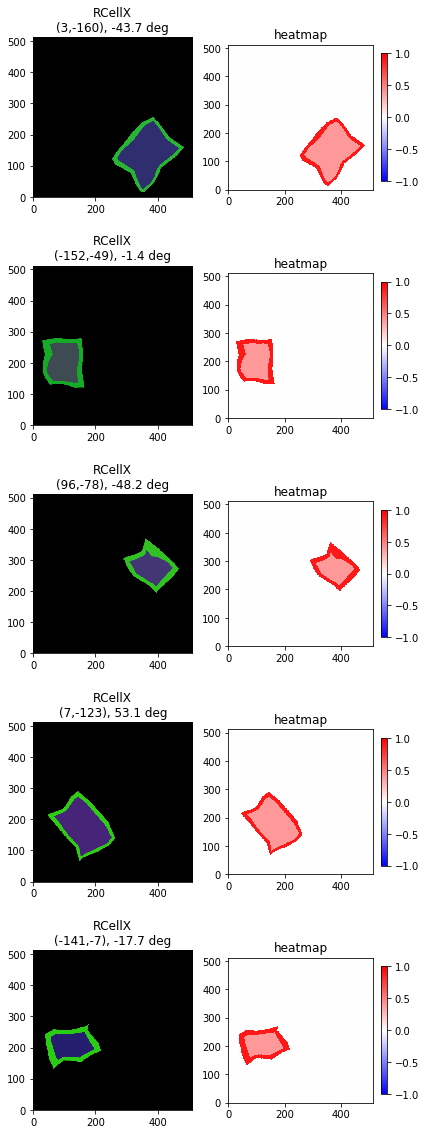

In [11]:
if RUN_TOGGLE['RCellXB']:
    sf.setup0001(general_meta_setting=None, explanation_setting=explanation_setting)
    N = 5
    fig_settings = []
    fig_layout = (N,2)
    for i in range(1,N+1):
        cobj, cimg, heatmap, variables = sf.get_random_RCellXB()
        print(set(list(heatmap.reshape(-1))))
        fig_settings.append((fig_layout+(2*i-1,), cimg, '%s\n(%s,%s), %s deg'%(str(variables['type']),
                str(variables['center'][0]),str(variables['center'][1]),str(round(variables['theta'],1))), False))
        fig_settings.append((fig_layout+(2*i,), heatmap, 'heatmap', True))
    create_multi_axes_figures(fig_settings, figsize=(6,np.max((16*int(N/5),5))))

{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}


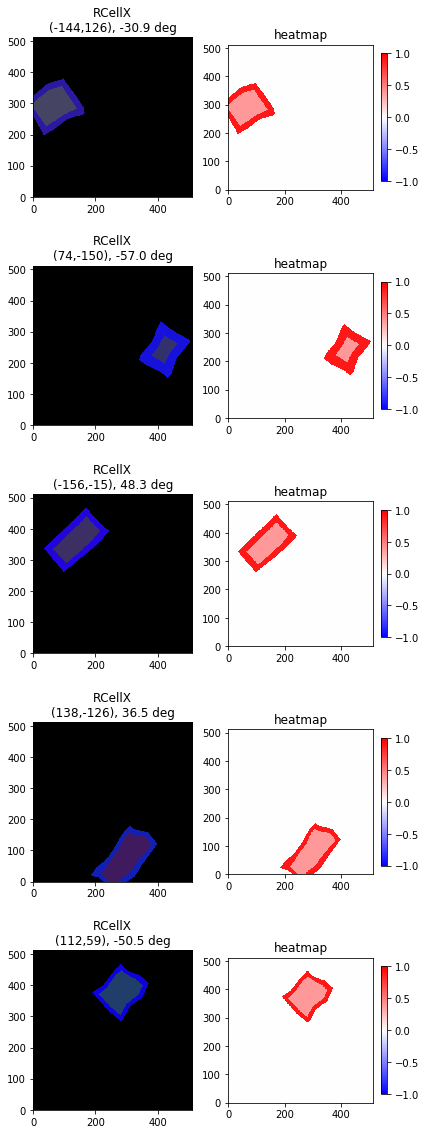

In [12]:
if RUN_TOGGLE['RCellXC']:
    sf.setup0001(general_meta_setting=None, explanation_setting=explanation_setting)
    N = 5
    fig_settings = []
    fig_layout = (N,2)
    for i in range(1,N+1):
        cobj, cimg, heatmap, variables = sf.get_random_RCellXC()
        print(set(list(heatmap.reshape(-1))))
        fig_settings.append((fig_layout+(2*i-1,), cimg, '%s\n(%s,%s), %s deg'%(str(variables['type']),
                str(variables['center'][0]),str(variables['center'][1]),str(round(variables['theta'],1))), False))
        fig_settings.append((fig_layout+(2*i,), heatmap, 'heatmap', True))
    create_multi_axes_figures(fig_settings, figsize=(6,np.max((16*int(N/5),5))))

{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}
{0.0, 0.4, 0.9}


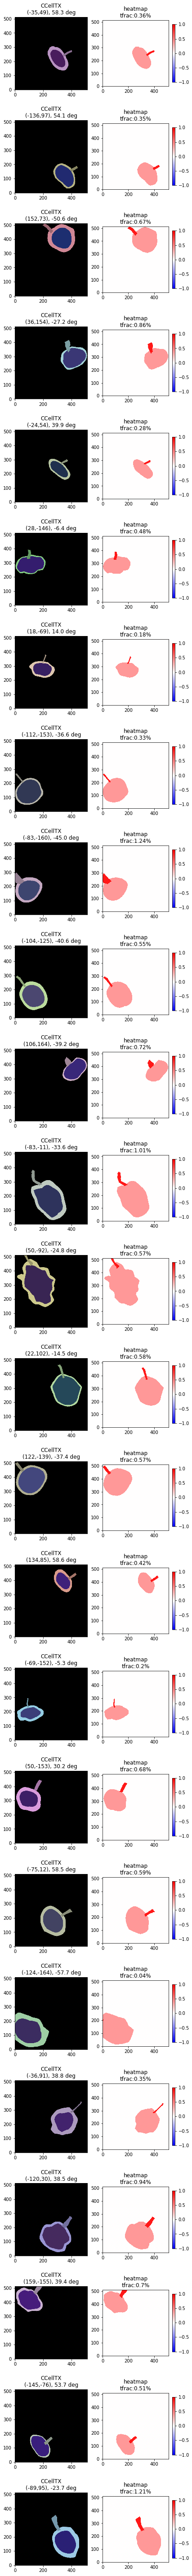

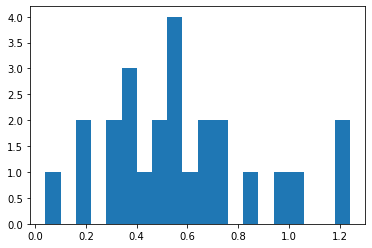

In [13]:
# cut off at tfraction 0.30% percent
if RUN_TOGGLE['CCellTX']:
    sf.setup0001(general_meta_setting=None, explanation_setting=explanation_setting)
    N = 25
    fig_settings = []
    fig_layout = (N,2)
    collect_tfrac = []
    for i in range(1,N+1):
        cobj, cimg, heatmap, variables = sf.get_random_CCellTX()
        print(set(list(heatmap.reshape(-1))))
        tailpos = cobj.parts['tailpos'].reshape(-1)
        tfraction = np.round(np.sum(tailpos)/len(tailpos)*100.,2)
        collect_tfrac.append(tfraction)
        fig_settings.append((fig_layout+(2*i-1,), cimg, '%s\n(%s,%s), %s deg'%(str(variables['type']),
                str(variables['center'][0]),str(variables['center'][1]),str(round(variables['theta'],1))), False))
        fig_settings.append((fig_layout+(2*i,), heatmap, 'heatmap\ntfrac:%s%%'%(str(tfraction)), True))
    create_multi_axes_figures(fig_settings, figsize=(6,np.max((16*int(N/5),5))))
    plt.figure()
    plt.hist(collect_tfrac,bins=20)
    plt.show()    


{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.4, 0.9}


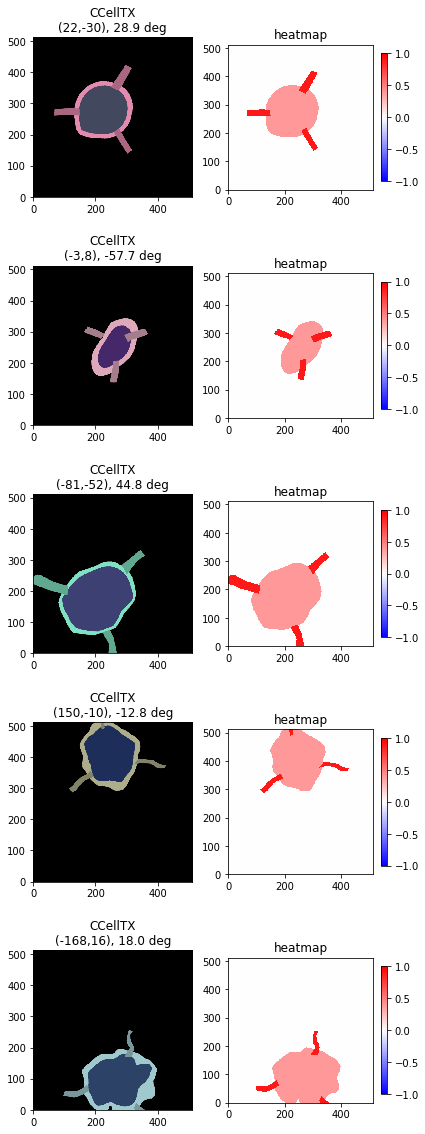

In [14]:
if RUN_TOGGLE['CCellTX3']:
    sf.setup0001(general_meta_setting=None, explanation_setting=explanation_setting)
    N = 5
    fig_settings = []
    fig_layout = (N,2)
    collect_tfrac = []
    for i in range(1,N+1):
        cobj, cimg, heatmap, variables = sf.get_random_CCellTX3()
        print(set(list(heatmap.reshape(-1))))
        fig_settings.append((fig_layout+(2*i-1,), cimg, '%s\n(%s,%s), %s deg'%(str(variables['type']),
                str(variables['center'][0]),str(variables['center'][1]),str(round(variables['theta'],1))), False))
        fig_settings.append((fig_layout+(2*i,), heatmap, 'heatmap'%(), True))
    create_multi_axes_figures(fig_settings, figsize=(6,np.max((16*int(N/5),5))))

{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}
{0.0, 0.9, 0.4}


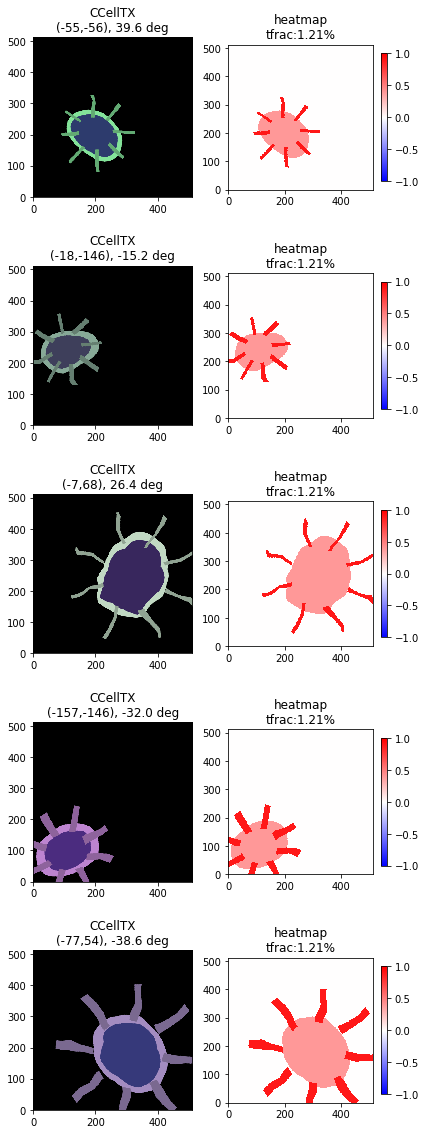

In [15]:
if RUN_TOGGLE['CCellTX8']:
    sf.setup0001(general_meta_setting=None, explanation_setting=explanation_setting)
    N = 5
    fig_settings = []
    fig_layout = (N,2)
    collect_tfrac = []
    for i in range(1,N+1):
        cobj, cimg, heatmap, variables = sf.get_random_CCellTX8()
        print(set(list(heatmap.reshape(-1))))
        fig_settings.append((fig_layout+(2*i-1,), cimg, '%s\n(%s,%s), %s deg'%(str(variables['type']),
                str(variables['center'][0]),str(variables['center'][1]),str(round(variables['theta'],1))), False))
        fig_settings.append((fig_layout+(2*i,), heatmap, 'heatmap\ntfrac:%s%%'%(str(tfraction)), True))
    create_multi_axes_figures(fig_settings, figsize=(6,np.max((16*int(N/5),5))))  